In [1]:
import os
os.chdir(os.path.dirname(os.path.dirname(os.getcwd())))

In [2]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scienceplots
# from tqdm import tqdm

# from agents.general_agent import GeneralAgent


In [3]:
df = pd.read_csv('results/optim_score_study_24_phase1_point_forecast.csv', index_col=0)
# keep only rows and columns from 1 to 12
df = df.iloc[:12, :12]
df

,1,2,3,4,5,6,7,8,9,10,11,12
1,0.797856,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.805056,0.799803,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.809059,0.805875,0.802999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.809093,0.805494,0.806572,0.801826,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.811150,0.807128,0.806225,0.805187,0.805216,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0.811657,0.807384,0.805309,0.805406,0.806001,0.805163,NaN,NaN,NaN,NaN,NaN,NaN
7,0.809899,0.807890,0.806610,0.804520,0.806463,0.807666,0.805168,NaN,NaN,NaN,NaN,NaN
8,0.807766,0.805553,0.808199,0.801756,0.807121,0.807337,0.807428,0.803634,NaN,NaN,NaN,NaN
9,0.811293,0.808626,0.805869,0.805229,0.806473,0.806871,0.807562,0.806449,0.805385,NaN,NaN,NaN
10,0.811371,0.807122,0.807245,0.804630,0.805607,0.807287,0.808292,0.806396,0.808029,0.806316,NaN,NaN


In [4]:
print(df.round(3).to_latex())

\begin{tabular}{lrrrrrrrrrrrr}
\toprule
{} &      1 &      2 &      3 &      4 &      5 &      6 &      7 &      8 &      9 &     10 &     11 &     12 \\
\midrule
1  &  0.798 &    NaN &    NaN &    NaN &    NaN &    NaN &    NaN &    NaN &    NaN &    NaN &    NaN &    NaN \\
2  &  0.805 &  0.800 &    NaN &    NaN &    NaN &    NaN &    NaN &    NaN &    NaN &    NaN &    NaN &    NaN \\
3  &  0.809 &  0.806 &  0.803 &    NaN &    NaN &    NaN &    NaN &    NaN &    NaN &    NaN &    NaN &    NaN \\
4  &  0.809 &  0.805 &  0.807 &  0.802 &    NaN &    NaN &    NaN &    NaN &    NaN &    NaN &    NaN &    NaN \\
5  &  0.811 &  0.807 &  0.806 &  0.805 &  0.805 &    NaN &    NaN &    NaN &    NaN &    NaN &    NaN &    NaN \\
6  &  0.812 &  0.807 &  0.805 &  0.805 &  0.806 &  0.805 &    NaN &    NaN &    NaN &    NaN &    NaN &    NaN \\
7  &  0.810 &  0.808 &  0.807 &  0.805 &  0.806 &  0.808 &  0.805 &    NaN &    NaN &    NaN &    NaN &    NaN \\
8  &  0.808 &  0.806 &  0.808 &  0.802 

/var/folders/8b/4kssy4kj57jb6rv1pmm5w8h80000gn/T/ipykernel_90965/2918450947.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df.round(3).to_latex())


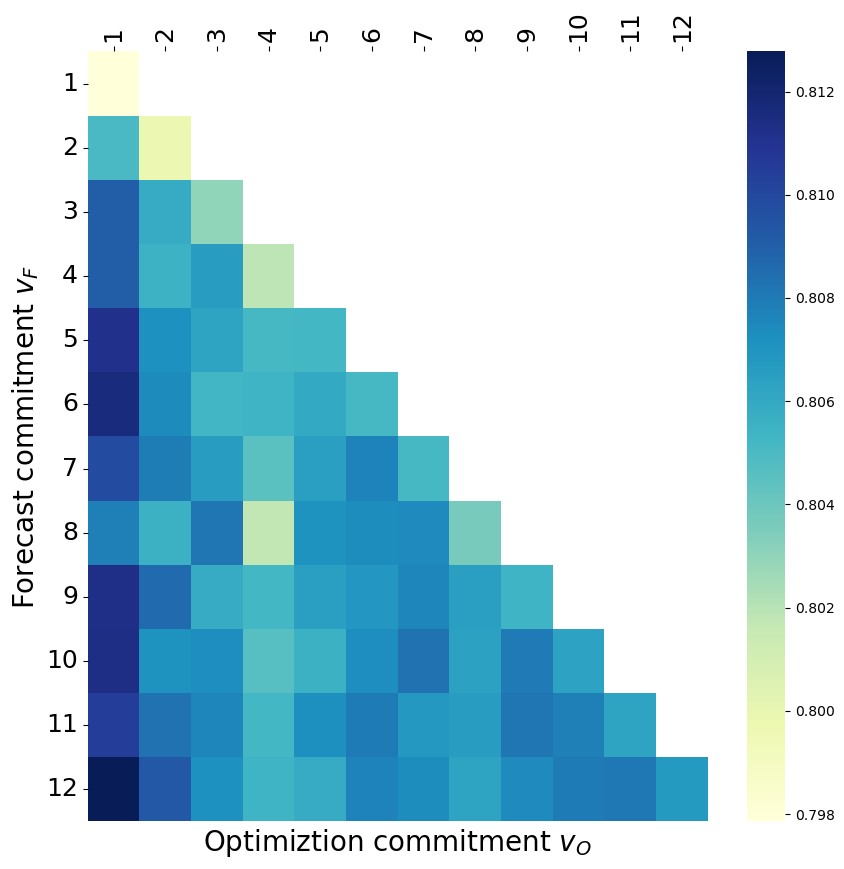

In [7]:
# draw a heatmap
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df, annot=False, ax=ax, fmt=".2f", cmap="YlGnBu")
ax.set_xlabel('Optimiztion commitment $v_{O}$', fontsize=20)
ax.set_ylabel('Forecast commitment $v_{F}$',  fontsize=20)
#ax.set_title('total_cost vs steps_skip and steps_skip_forecast')
# make the heatmap looks better
#ax.invert_yaxis()
ax.xaxis.tick_top()
plt.xticks(rotation=90, fontsize=18)
plt.yticks(rotation=0, fontsize=18)
plt.show()

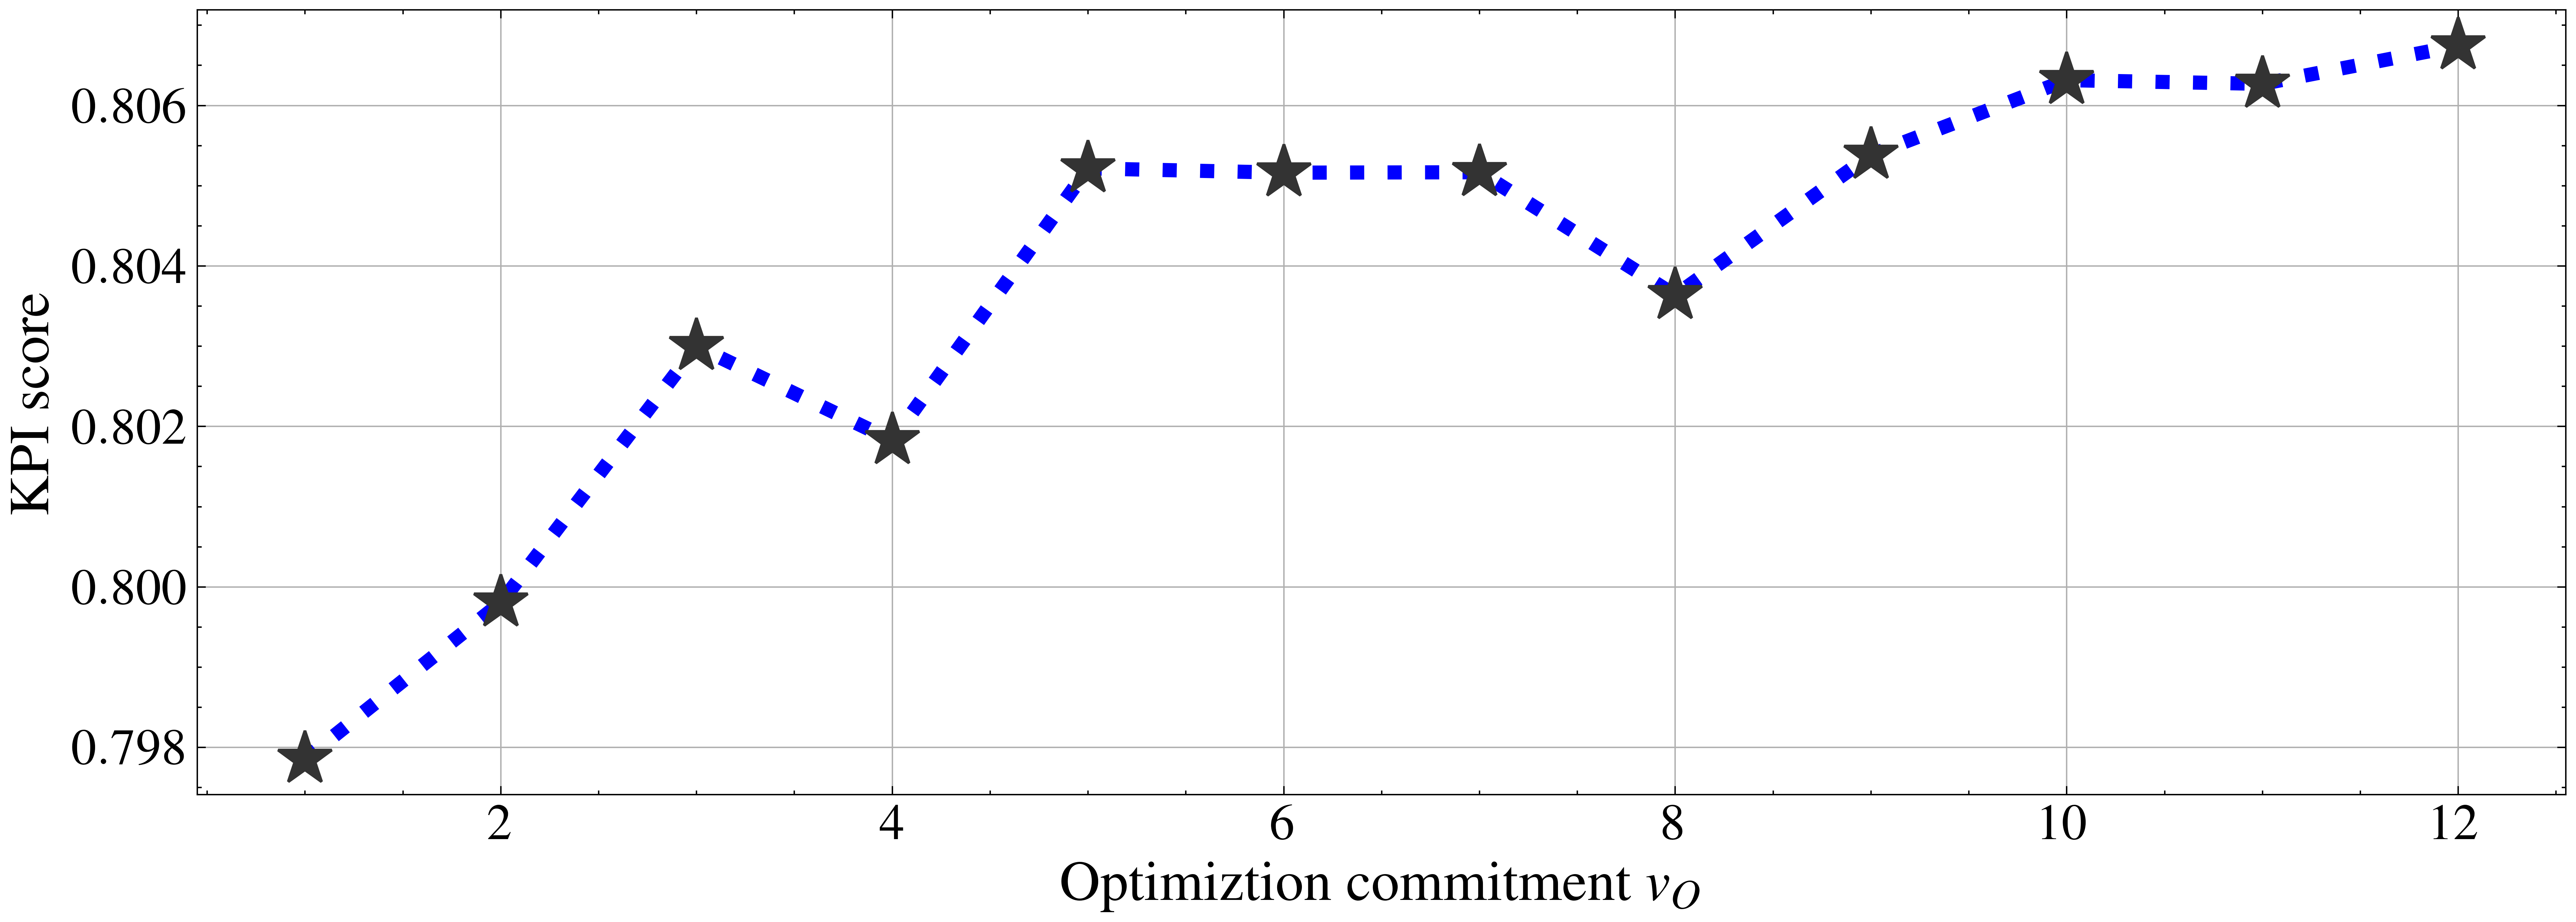

In [8]:
# get a diagonal line
plt.style.use(['science','ieee'])
diag = np.diag(df)
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
# plot the diagonal vs index of df
ax.plot(df.index, diag, marker='*', linestyle='dotted', 
        linewidth=5, markersize=20, color='blue', markeredgecolor='#333333',  markerfacecolor='#333333')
ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)
ax.grid()
plt.xlabel('Optimiztion commitment $v_{O}$', fontsize=20)
plt.ylabel('KPI score',  fontsize=20)
# add title
#plt.title('Optimization scores on the Diagonal', fontsize=18)
plt.show()

In [9]:
scores_no_grid_point = pd.read_csv('results/stability_score_study_24_phase1_nogridscore.csv', index_col=0)
scores_no_grid_point = scores_no_grid_point.iloc[:12, :12]
scores_no_grid_point

,1
1,0.500398
2,0.502955
3,0.505707
4,0.505477
5,0.506552
6,0.507136
7,0.507183
8,0.506799
9,0.508249
10,0.508100


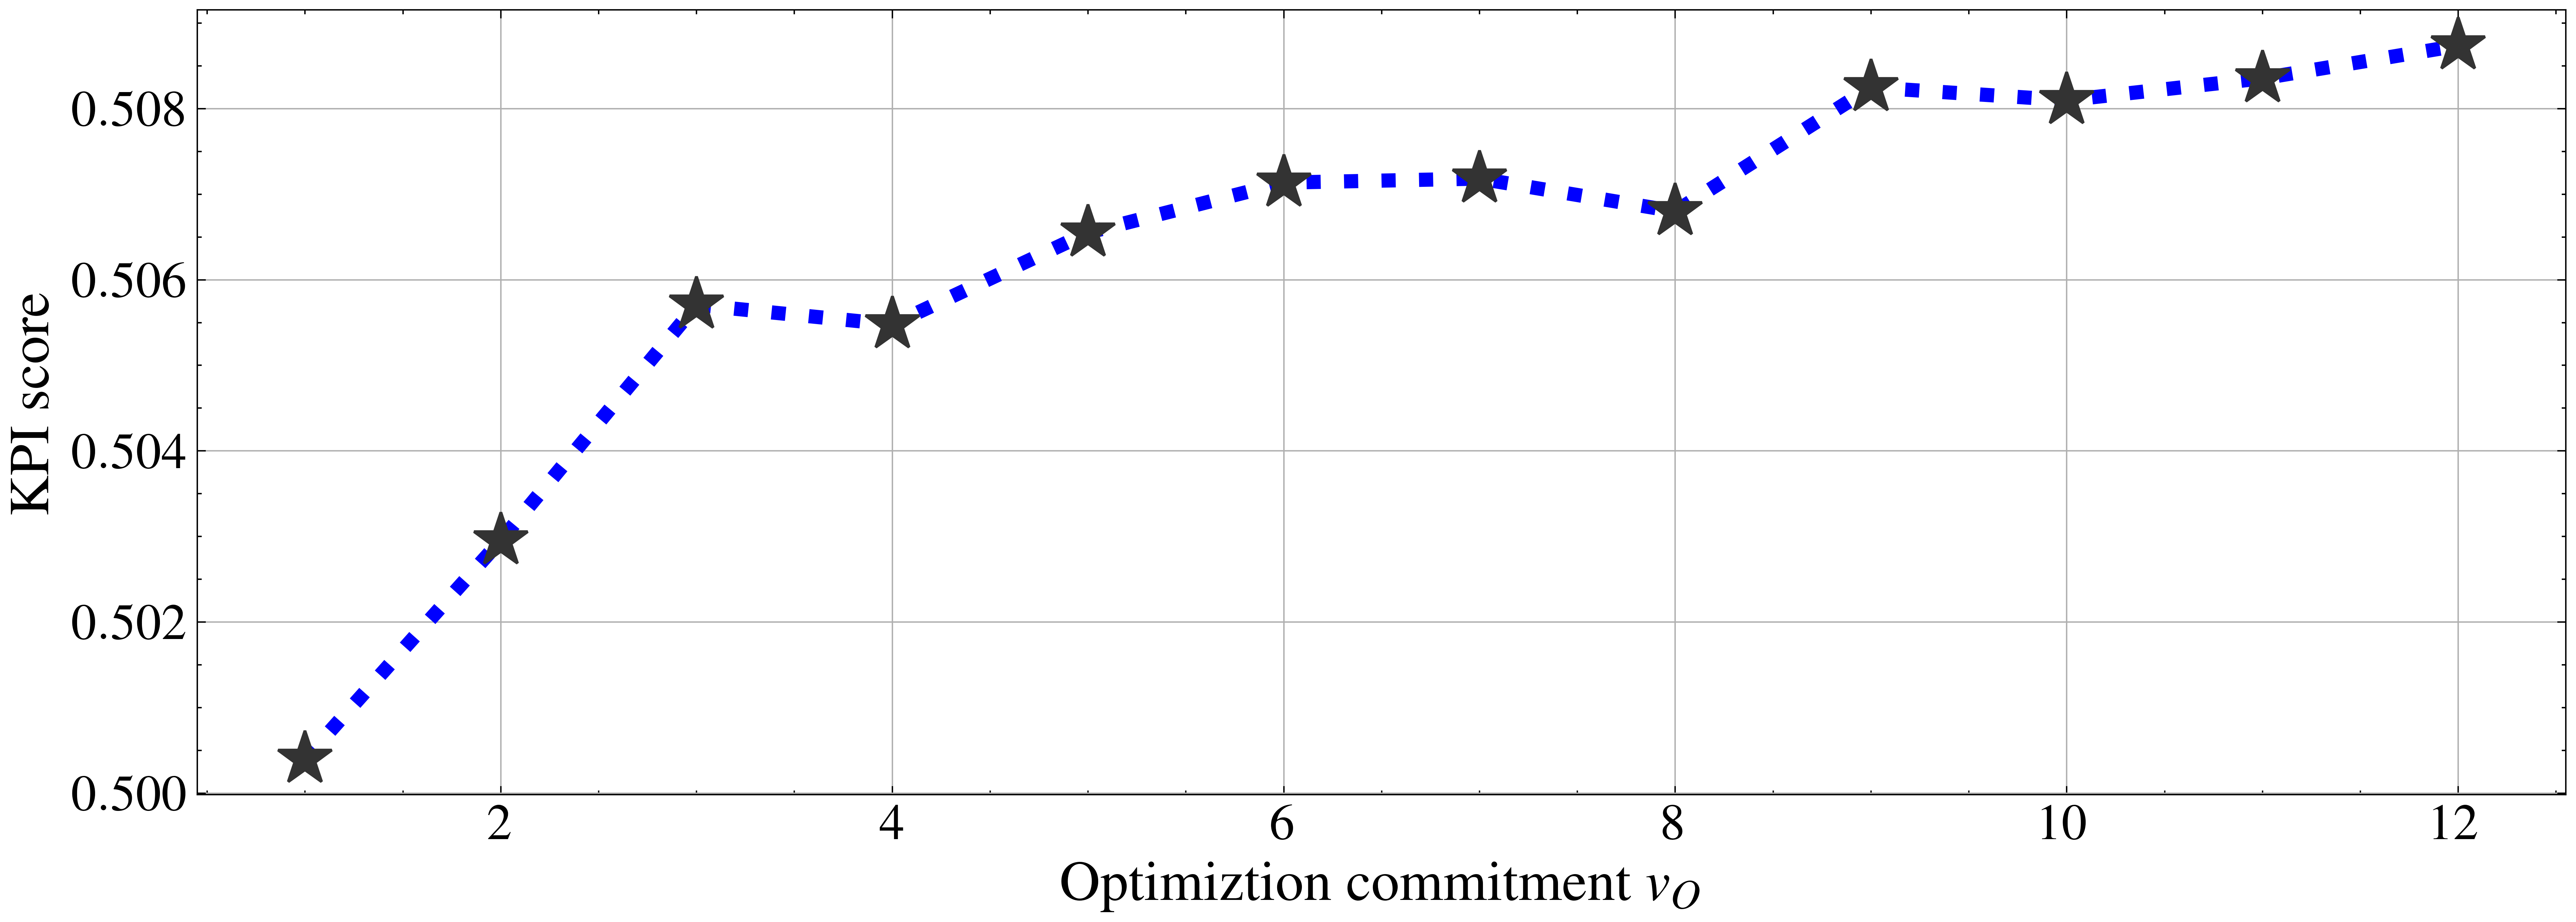

In [10]:
# get a diagonal line
plt.style.use(['science','ieee'])
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
# plot the diagonal vs index of df
ax.plot(scores_no_grid_point.index, scores_no_grid_point.values, marker='*', linestyle='dotted', 
        linewidth=5, markersize=20, color='blue', markeredgecolor='#333333',  markerfacecolor='#333333')
ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)
ax.grid()
plt.xlabel('Optimiztion commitment $v_{O}$', fontsize=20)
plt.ylabel('KPI score',  fontsize=20)
# add title
#plt.title('Optimization scores on the Diagonal', fontsize=18)
plt.show()